In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.dates as mtd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve,accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression 
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
flightdataframeJan = pd.read_csv('/content/drive/MyDrive/AbiML/Internship Tasks/internshipDatas/flightdataJanuary.csv')
flightdataframeFeb = pd.read_csv('/content/drive/MyDrive/AbiML/Internship Tasks/internshipDatas/flightdataFebruary.csv')
flightdataframeMar = pd.read_csv('/content/drive/MyDrive/AbiML/Internship Tasks/internshipDatas/flightdataMarch.csv')
flightdataframeApr = pd.read_csv('/content/drive/MyDrive/AbiML/Internship Tasks/internshipDatas/flightdataAprilcsv.txt')
flightdataframeMay = pd.read_csv('/content/drive/MyDrive/AbiML/Internship Tasks/internshipDatas/flightdataMay.csv')

In [ ]:
consolidatedfivemonthsdf = pd.concat([flightdataframeJan,flightdataframeFeb,flightdataframeMar,flightdataframeApr,flightdataframeMay], axis=0)
consolidatedfivemonthsdf1=consolidatedfivemonthsdf.drop(columns=['Unnamed: 74'] ,axis=1)
consolidatedfivemonthsdf1

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,BRANDED_CODE_SHARE,MKT_CARRIER_AIRLINE_ID,MKT_CARRIER,MKT_CARRIER_FL_NUM,SCH_OP_UNIQUE_CARRIER,SCH_OP_CARRIER_AIRLINE_ID,SCH_OP_CARRIER,SCH_OP_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,DUP,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME
0,2021,1,1,17,7,2021-01-17,DL,DL,19790,DL,1089,NaN,nan,NaN,nan,DL,19790,DL,N326NB,1089,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1153,1151.0,-2.0,0.0,0.0,-1.0,1100-1159,28.0,1219.0,1525.0,11.0,1523,1536.0,13.0,13.0,0.0,0.0,1500-1559,0.0,NaN,0.0,N,150.0,165.0,126.0,1.0,986.0,4,nan,nan,nan,nan,nan,nan,nan,nan
1,2021,1,1,17,7,2021-01-17,DL,DL,19790,DL,1090,NaN,nan,NaN,nan,DL,19790,DL,N702TW,1090,14747,1474703,30559,SEA,"Seattle, WA",WA,53,Washington,93,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,718,716.0,-2.0,0.0,0.0,-1.0,0700-0759,13.0,729.0,949.0,16.0,1019,1005.0,-14.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,N,121.0,109.0,80.0,1.0,689.0,3,nan,nan,nan,nan,nan,nan,nan,nan
2,2021,1,1,17,7,2021-01-17,DL,DL,19790,DL,1091,NaN,nan,NaN,nan,DL,19790,DL,N909DN,1091,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,14747,1474703,30559,SEA,"Seattle, WA",WA,53,Washington,93,959,953.0,-6.0,0.0,0.0,-1.0,0900-0959,26.0,1019.0,1111.0,5.0,1129,1116.0,-13.0,0.0,0.0,-1.0,1100-1159,0.0,NaN,0.0,N,150.0,143.0,112.0,1.0,689.0,3,nan,nan,nan,nan,nan,nan,nan,nan
3,2021,1,1,17,7,2021-01-17,DL,DL,19790,DL,1092,NaN,nan,NaN,nan,DL,19790,DL,N908DN,1092,14027,1402702,34027,PBI,"West Palm Beach/Palm Beach, FL",FL,12,Florida,33,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1255,1250.0,-5.0,0.0,0.0,-1.0,1200-1259,14.0,1304.0,1518.0,8.0,1544,1526.0,-18.0,0.0,0.0,-2.0,1500-1559,0.0,NaN,0.0,N,169.0,156.0,134.0,1.0,1086.0,5,nan,nan,nan,nan,nan,nan,nan,nan
4,2021,1,1,17,7,2021-01-17,DL,DL,19790,DL,1093,NaN,nan,NaN,nan,DL,19790,DL,N363DN,1093,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,15304,1530402,33195,TPA,"Tampa, FL",FL,12,Florida,33,833,830.0,-3.0,0.0,0.0,-1.0,0800-0859,40.0,910.0,1137.0,3.0,1126,1140.0,14.0,14.0,0.0,0.0,1100-1159,0.0,NaN,0.0,N,173.0,190.0,147.0,1.0,983.0,4,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520054,2021,2,5,2,7,2021-05-02,UA,UA_CODESHARE,19977,UA,3722,NaN,nan,NaN,nan,ZW,20046,ZW,N426AW,3722,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,15624,1562404,31504,VPS,"Valparaiso, FL",FL,12,Florida,33,1104,1058.0,-6.0,0.0,0.0,-1.0,1100-1159,14.0,1112.0,1303.0,9.0,1326,1312.0,-14.0,0.0,0.0,-1.0,1300-1359,0.0,NaN,0.0,N,142.0,134.0,111.0,1.0,796.0,4,nan,nan,nan,nan,nan,nan,nan,nan
520055,2021,2,5,2,7,2021-05-02,UA,UA_CODESHARE,19977,UA,3721,NaN,nan,NaN,nan,ZW,20046,ZW,N470ZW,3721,12264,1226402,30852,IAD,"Washington, DC",VA,51,Virginia,38,10792,1079206,30792,BUF,"Buffalo, NY",NY,36,New York,22,1745,1742.0,-3.0,0.0,0.0,-1.0,1700-1759,15.0,1757.0,1848.0,3.0,1906,1851.0,-15.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,N,81.0,69.0,51.0,1.0

In [ ]:
consolidatedSelectedColumns=consolidatedfivemonthsdf1[['MONTH','DAY_OF_MONTH', 'DAY_OF_WEEK','TAIL_NUM','OP_CARRIER','ORIGIN','ORIGIN_AIRPORT_ID','DEP_DEL15','CRS_ELAPSED_TIME','DEP_DELAY','TAXI_OUT','AIR_TIME','WHEELS_OFF' ,'OP_CARRIER_FL_NUM','DEP_TIME','CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY','SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
consolidatedSelectedColumns

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,OP_CARRIER,ORIGIN,ORIGIN_AIRPORT_ID,DEP_DEL15,CRS_ELAPSED_TIME,DEP_DELAY,TAXI_OUT,AIR_TIME,WHEELS_OFF,OP_CARRIER_FL_NUM,DEP_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,17,7,N326NB,DL,DFW,11298,0.0,150.0,-2.0,28.0,126.0,1219.0,1089,1151.0,nan,nan,nan,nan,nan
1,1,17,7,N702TW,DL,SEA,14747,0.0,121.0,-2.0,13.0,80.0,729.0,1090,716.0,nan,nan,nan,nan,nan
2,1,17,7,N909DN,DL,SLC,14869,0.0,150.0,-6.0,26.0,112.0,1019.0,1091,953.0,nan,nan,nan,nan,nan
3,1,17,7,N908DN,DL,PBI,14027,0.0,169.0,-5.0,14.0,134.0,1304.0,1092,1250.0,nan,nan,nan,nan,nan
4,1,17,7,N363DN,DL,DTW,11433,0.0,173.0,-3.0,40.0,147.0,910.0,1093,830.0,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520054,5,2,7,N426AW,ZW,ORD,13930,0.0,142.0,-6.0,14.0,111.0,1112.0,3722,1058.0,nan,nan,nan,nan,nan
520055,5,2,7,N470ZW,ZW,IAD,12264,0.0,81.0,-3.0,15.0,51.0,1757.0,3721,1742.0,nan,nan,nan,nan,nan
520056,5,2,7,N443AW,ZW,CRW,11146,0.0,105.0,-7.0,26.0,69.0,739.0,3720,713.0,nan,nan,nan,nan,nan
520057,5,1,6,N12157,C5,IAD,12264,0.0,76.0,-1.0,12.0,51.0,1041.0,5009,1029.0,nan,nan,nan,nan,nan


In [ ]:
consolidatedSelectedColumns.dropna(subset=['DEP_DEL15'],inplace=True)

In [ ]:
pd.DataFrame({'unique_values':consolidatedSelectedColumns.nunique(),
              'missing_values': consolidatedSelectedColumns.isna().sum(),
              'datatype':consolidatedSelectedColumns.dtypes,
             
'count':consolidatedSelectedColumns.count()
              })

,unique_values,missing_values,datatype,count
MONTH,5,0,int64,2156140
DAY_OF_MONTH,31,0,int64,2156140
DAY_OF_WEEK,7,0,int64,2156140
TAIL_NUM,5400,0,object,2156140
OP_CARRIER,22,0,object,2156140
ORIGIN,375,0,object,2156140
ORIGIN_AIRPORT_ID,375,0,int64,2156140
DEP_DEL15,2,0,float64,2156140
DEP_DELAY,1370,0,float64,2156140
TAXI_OUT,165,427,float64,2155713


In [ ]:
# Define systematic sampling function
def systematic_sampling(consolidatedSelectedColumns, step):
 
    indexes = np.arange(0, len(consolidatedSelectedColumns), step=step)
    systematic_sample = consolidatedSelectedColumns.iloc[indexes]
    return systematic_sample
 
 
# Obtain a systematic sample and save it in a new variable
systematic_sample = systematic_sampling(consolidatedSelectedColumns, 10)
 
# View sampled data frame
#display(systematic_sample)

In [ ]:
pd.DataFrame({'unique_values':systematic_sample.nunique(),
              'missing_values': systematic_sample.isna().sum(),
              'datatype':systematic_sample.dtypes,
              'count':systematic_sample.count()
              })

,unique_values,missing_values,datatype,count
MONTH,5,0,int64,215614
DAY_OF_MONTH,31,0,int64,215614
DAY_OF_WEEK,7,0,int64,215614
TAIL_NUM,5364,0,object,215614
OP_CARRIER,22,0,object,215614
ORIGIN,373,0,object,215614
ORIGIN_AIRPORT_ID,373,0,int64,215614
DEP_DEL15,2,0,float64,215614
CRS_ELAPSED_TIME,505,0,float64,215614
DEP_DELAY,686,0,float64,215614


* Here we found that Delay cause because of some other reasons - not by CARRIER_DELAY	WEATHER_DELAY	NAS_DELAY	SECURITY_DELAY &	LATE_AIRCRAFT_DELAY.
* Therefore need to take DEP_DEL time on average for all categorical columns, then add weightage to that. 
* IV must be ready to use variable or calculatable columns. CARRIER_DELAY	WEATHER_DELAY	NAS_DELAY	SECURITY_DELAY	LATE_AIRCRAFT_DELAY - are not given as input to model, so eliminate those fields. 


In [ ]:
systematic_sample_otherdelay=systematic_sample[(systematic_sample['DEP_DEL15']==1) & systematic_sample['CARRIER_DELAY'].isna() & systematic_sample['NAS_DELAY'].isna() & systematic_sample['WEATHER_DELAY'].isna() & systematic_sample['SECURITY_DELAY'].isna() & systematic_sample['LATE_AIRCRAFT_DELAY'].isna()]
systematic_sample_otherdelay

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,OP_CARRIER,ORIGIN,ORIGIN_AIRPORT_ID,DEP_DEL15,CRS_ELAPSED_TIME,DEP_DELAY,TAXI_OUT,AIR_TIME,WHEELS_OFF,OP_CARRIER_FL_NUM,DEP_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
650,1,17,7,N136DQ,DL,SLC,14869,1.0,123.0,17.0,26.0,81.0,903.0,2013,837.0,nan,nan,nan,nan,nan
980,1,18,1,N175DZ,DL,JFK,12478,1.0,385.0,16.0,10.0,335.0,1826.0,313,1816.0,nan,nan,nan,nan,nan
1020,1,18,1,N343DN,DL,LAX,12892,1.0,248.0,31.0,14.0,203.0,1212.0,367,1158.0,nan,nan,nan,nan,nan
2730,1,19,2,N3756,DL,ANC,10299,1.0,220.0,15.0,27.0,173.0,642.0,653,615.0,nan,nan,nan,nan,nan
2970,1,19,2,N904DN,DL,DEN,11292,1.0,160.0,21.0,12.0,127.0,1708.0,1004,1656.0,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515292,5,11,2,N17146,C5,MEM,13244,1.0,115.0,20.0,23.0,nan,1738.0,4369,1715.0,nan,nan,nan,nan,nan
515644,5,10,1,N524GJ,G7,ORD,13930,1.0,108.0,15.0,12.0,72.0,2017.0,4527,2005.0,nan,nan,nan,nan,nan
517388,5,7,5,N17159,C5,PNS,14193,1.0,111.0,23.0,11.0,81.0,1433.0,4359,1422.0,nan,nan,nan,nan,nan
518829,5,4,2,N23139,C5,ECP,11481,1.0,125.0,15.0,13.0,102.0,1703.0,4266,1650.0,nan,nan,nan,nan,nan


### column selection

In [ ]:
systematic_sample_selectedcols=systematic_sample[['MONTH','DAY_OF_MONTH', 'DAY_OF_WEEK','TAIL_NUM','OP_CARRIER','OP_CARRIER_FL_NUM','ORIGIN','ORIGIN_AIRPORT_ID','DEP_DEL15','DEP_DELAY','DEP_TIME','TAXI_OUT','WHEELS_OFF','CRS_ELAPSED_TIME']]

In [ ]:
systematic_sample_selectedcols['CRS_ELAPSED_TIME'].isna().sum()

0

In [ ]:
systematic_sample_selectedcols['DEP_TIME'].isna().sum()

0

# CREATE DEP_TIME_BLK as 6 block per day, using DEP_time with 24 hrs time stamp

challenges faced, to split hours alone ('%04d')to find this query

In [ ]:


def get_dep_time_blk(dep_time):
    dep_hour = str('%04d' %(dep_time))[:2]
    
    return dep_hour

systematic_sample_selectedcols['DEP_TIMEslot_BLK'] = systematic_sample_selectedcols.DEP_TIME.apply(get_dep_time_blk)
print(systematic_sample_selectedcols[['DEP_TIME','DEP_TIMEslot_BLK']].head(5))


    DEP_TIME DEP_TIMEslot_BLK
0     1151.0               11
10     939.0               09
20    1006.0               10
30    1310.0               13
40     559.0               05


In [ ]:
systematic_sample_selectedcols.dtypes

MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
TAIL_NUM              object
OP_CARRIER            object
OP_CARRIER_FL_NUM      int64
ORIGIN                object
ORIGIN_AIRPORT_ID      int64
DEP_DEL15            float64
DEP_DELAY            float64
DEP_TIME             float64
TAXI_OUT             float64
WHEELS_OFF           float64
CRS_ELAPSED_TIME     float64
DEP_TIMEslot_BLK      object
dtype: object

In [ ]:
systematic_sample_selectedcols[['DEP_TIMEslot_BLK']]=systematic_sample_selectedcols[['DEP_TIMEslot_BLK']].astype(int)

* challenges faced, dataset has both 2400(for 12AM), and 00mm.0(as mm.0) in DEP_TIME(didnt tally with time block) 
* change 2400 as 00 in time blick

In [ ]:
systematic_sample_selectedcols[['DEP_TIME','DEP_TIMEslot_BLK']][systematic_sample_selectedcols['DEP_TIMEslot_BLK']==0]

,DEP_TIME,DEP_TIMEslot_BLK
6063,58.0,0
6273,48.0,0
6414,42.0,0
6964,22.0,0
8284,50.0,0
...,...,...
486170,48.0,0
486460,23.0,0
492279,52.0,0
493172,16.0,0


In [ ]:
systematic_sample_selectedcols[['DEP_TIME','DEP_TIMEslot_BLK']][systematic_sample_selectedcols['DEP_TIMEslot_BLK']==24]

,DEP_TIME,DEP_TIMEslot_BLK
84301,2400.0,24
157290,2400.0,24
165828,2400.0,24
213673,2400.0,24
237631,2400.0,24
44139,2400.0,24
172101,2400.0,24
175414,2400.0,24
226664,2400.0,24
261206,2400.0,24


### Seperate perday into 6 block

In [ ]:
for dataset in systematic_sample_selectedcols:
    systematic_sample_selectedcols.loc[systematic_sample_selectedcols['DEP_TIMEslot_BLK'] >=0, 'Dep_period'] = 'Midnight'
    systematic_sample_selectedcols.loc[systematic_sample_selectedcols['DEP_TIMEslot_BLK'] >=4,'Dep_period'] ='Early morning'
    systematic_sample_selectedcols.loc[systematic_sample_selectedcols['DEP_TIMEslot_BLK'] >=7,'Dep_period'] ='Morning'
    systematic_sample_selectedcols.loc[systematic_sample_selectedcols['DEP_TIMEslot_BLK'] >=12,'Dep_period'] ='Afternoon'
    systematic_sample_selectedcols.loc[systematic_sample_selectedcols['DEP_TIMEslot_BLK'] >=17,'Dep_period'] ='Evening'
    systematic_sample_selectedcols.loc[systematic_sample_selectedcols['DEP_TIMEslot_BLK'] >=20,'Dep_period'] ='Night'
    systematic_sample_selectedcols.loc[systematic_sample_selectedcols['DEP_TIMEslot_BLK'] ==24, 'Dep_period'] = 'Midnight'


systematic_sample_selectedcols[['DEP_TIMEslot_BLK','Dep_period']].head()


,DEP_TIMEslot_BLK,Dep_period
0,11,Morning
10,9,Morning
20,10,Morning
30,13,Afternoon
40,5,Early morning


### Departure period vs departure delay count

In [ ]:
delay_timeslotwise_count = systematic_sample_selectedcols[['Dep_period','DEP_DEL15']].groupby(['Dep_period']).sum('DEP_DEL15').sort_values(['DEP_DEL15'],ascending=False).reset_index()
delay_timeslotwise_count

,Dep_period,DEP_DEL15
0,Afternoon,8110.0
1,Evening,5592.0
2,Morning,5366.0
3,Night,4069.0
4,Early morning,412.0
5,Midnight,271.0


Adding 3 kinds of weightage to categorical columns
1. dep_del count
2. Time slot wise dep delay count
3. Taxi out time Dep delay count

# Column wise weightage 
1. Departure time-  Perodic time slot delay weights 
2. ORIGIN_AIRPORT_ID - Perodic time slot delay weights
3. OP_carrier airline- Perodic time slot delay weights
4. Origin- Perodic time slot delay weights
5. Tail number-Delay weight
6. Days of Week - Delay weight
  * Including Week_days-0 and Week_ends-1 column
7. Days of month - Delay weight
8. Month- Delay weight
9. OP_CARRIER_FL_NUM - Taxi out delay weights

### 1. Departure time- Perodic time slot delay weights

In [ ]:
periodcountperdeptime = systematic_sample_selectedcols[['DEP_TIMEslot_BLK','Dep_period']].groupby(['DEP_TIMEslot_BLK','Dep_period']).count().reset_index()
periodcountperdeptime

,DEP_TIMEslot_BLK,Dep_period
0,0,Midnight
1,1,Midnight
2,2,Midnight
3,3,Midnight
4,4,Early morning
5,5,Early morning
6,6,Early morning
7,7,Morning
8,8,Morning
9,9,Morning


In [ ]:
pd.options.display.float_format = '{:.1f}'.format
periodcountperdeptime = systematic_sample_selectedcols.groupby(['Dep_period','DEP_TIMEslot_BLK']).agg({'Dep_period' : ['count'],'DEP_DEL15' : ['sum']}).reset_index()
periodcountperdeptime.columns=['Dep_period','DEP_TIMEslot_BLK','DEP_TIME_timeslot_tot_count','DEP_TIME_timeslotwise_DELAY_COUNT']
periodcountperdeptime.sort_values(['DEP_TIME_timeslotwise_DELAY_COUNT'],ascending=False)
percentage_DEP_TIMEslot= (periodcountperdeptime['DEP_TIME_timeslotwise_DELAY_COUNT']/periodcountperdeptime['DEP_TIME_timeslot_tot_count'])*100
periodcountperdeptime['percentage_DEP_TIMEslot_del']=percentage_DEP_TIMEslot
periodcountperdeptime.sort_values(by='percentage_DEP_TIMEslot_del',ascending=False)
periodcountperdeptime['DEP_TIME_timeslot_weight'] = pd.qcut(periodcountperdeptime['percentage_DEP_TIMEslot_del'], 24, labels = False,duplicates='drop')
periodcountperdeptime.sort_values(by='DEP_TIME_timeslot_weight',ascending=False)
print(periodcountperdeptime)
systematic_sample_selectedcols0 = systematic_sample_selectedcols.merge(periodcountperdeptime, left_on=['DEP_TIMEslot_BLK','Dep_period'], right_on=['DEP_TIMEslot_BLK','Dep_period'])
systematic_sample_selectedcols0.drop(columns=['percentage_DEP_TIMEslot_del','DEP_TIME_timeslotwise_DELAY_COUNT','DEP_TIME_timeslot_tot_count','DEP_TIMEslot_BLK'], inplace=True, axis=1)
print(systematic_sample_selectedcols0)

       Dep_period  ...  DEP_TIME_timeslot_weight
0       Afternoon  ...                         7
1       Afternoon  ...                         8
2       Afternoon  ...                         9
3       Afternoon  ...                        10
4       Afternoon  ...                        11
5   Early morning  ...                         0
6   Early morning  ...                         0
7   Early morning  ...                         1
8         Evening  ...                        12
9         Evening  ...                        14
10        Evening  ...                        15
11       Midnight  ...                        21
12       Midnight  ...                        19
13       Midnight  ...                        22
14       Midnight  ...                        16
15       Midnight  ...                        23
16        Morning  ...                         2
17        Morning  ...                         3
18        Morning  ...                         5
19        Morning  .

### 2. ORIGIN_AIRPORT_ID - Perodic time slot delay weights

In [ ]:
periodcountperairport = systematic_sample_selectedcols[['ORIGIN_AIRPORT_ID','Dep_period']].groupby(['ORIGIN_AIRPORT_ID','Dep_period']).count().reset_index()
periodcountperairport

,ORIGIN_AIRPORT_ID,Dep_period
0,10135,Afternoon
1,10135,Early morning
2,10135,Evening
3,10135,Morning
4,10135,Night
...,...,...
1589,16218,Evening
1590,16218,Morning
1591,16218,Night
1592,16869,Afternoon


In [ ]:
pd.options.display.float_format = '{:.1f}'.format
periodcountperairport = systematic_sample_selectedcols.groupby(['Dep_period','ORIGIN_AIRPORT_ID']).agg({'Dep_period' : ['count'],'DEP_DEL15' : ['sum']}).reset_index()
periodcountperairport.columns=['Dep_period','ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_ID_timeslot_tot_count','ORIGIN_AIRPORT_timeslotwise_DELAY_COUNT']
periodcountperairport.sort_values(['ORIGIN_AIRPORT_timeslotwise_DELAY_COUNT'],ascending=False)
percentage= (periodcountperairport['ORIGIN_AIRPORT_timeslotwise_DELAY_COUNT']/periodcountperairport['ORIGIN_AIRPORT_ID_timeslot_tot_count'])*100
periodcountperairport['percentage_Delay']=percentage
periodcountperairport.sort_values(by='percentage_Delay',ascending=False)
periodcountperairport['ORIGIN_AIRPORT_ID_timeslot_weight'] = pd.qcut(periodcountperairport['percentage_Delay'], 200, labels = False,duplicates='drop')
periodcountperairport

,Dep_period,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_ID_timeslot_tot_count,ORIGIN_AIRPORT_timeslotwise_DELAY_COUNT,percentage_Delay,ORIGIN_AIRPORT_ID_timeslot_weight
0,Afternoon,10135,58,3.0,5.2,22
1,Afternoon,10136,21,2.0,9.5,51
2,Afternoon,10140,238,29.0,12.2,68
3,Afternoon,10141,19,0.0,0.0,0
4,Afternoon,10146,24,2.0,8.3,43
...,...,...,...,...,...,...
1589,Night,15380,4,1.0,25.0,101
1590,Night,15412,16,4.0,25.0,101
1591,Night,15624,2,1.0,50.0,118
1592,Night,15919,6,5.0,83.3,124


Challenges faced
* systematic_sample_selectedcols1 = systematic_sample_selectedcols0.merge(periodcountperairport, left_on=['ORIGIN_AIRPORT_ID','Dep_period'], right_on=['ORIGIN_AIRPORT_ID','Dep_period'])


In [ ]:
systematic_sample_selectedcols1 = systematic_sample_selectedcols0.merge(periodcountperairport, left_on=['ORIGIN_AIRPORT_ID','Dep_period'], right_on=['ORIGIN_AIRPORT_ID','Dep_period'])
systematic_sample_selectedcols1.drop(columns=['ORIGIN_AIRPORT_ID','percentage_Delay','ORIGIN_AIRPORT_ID_timeslot_tot_count','ORIGIN_AIRPORT_timeslotwise_DELAY_COUNT'], inplace=True, axis=1)
systematic_sample_selectedcols1

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEP_DEL15,DEP_DELAY,DEP_TIME,TAXI_OUT,WHEELS_OFF,CRS_ELAPSED_TIME,Dep_period,DEP_TIME_timeslot_weight,ORIGIN_AIRPORT_ID_timeslot_weight
0,1,17,7,N326NB,DL,1089,DFW,0.0,-2.0,1151.0,28.0,1219.0,150.0,Morning,7,56
1,1,24,7,N227NN,MQ,3326,DFW,1.0,68.0,1153.0,12.0,1205.0,181.0,Morning,7,56
2,1,5,2,N285NN,MQ,3352,DFW,1.0,71.0,1130.0,12.0,1142.0,109.0,Morning,7,56
3,1,22,5,N240NN,MQ,3510,DFW,0.0,8.0,1108.0,38.0,1146.0,160.0,Morning,7,56
4,1,3,7,N831AE,MQ,3628,DFW,1.0,73.0,1152.0,26.0,1218.0,110.0,Morning,7,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215609,4,12,1,N965JT,B6,1603,BDL,1.0,593.0,211.0,9.0,220.0,197.0,Midnight,22,124
215610,4,25,7,N373FR,F9,2015,CLE,1.0,286.0,241.0,10.0,251.0,277.0,Midnight,22,124
215611,4,18,7,N585JB,B6,266,RSW,1.0,516.0,2400.0,15.0,15.0,190.0,Midnight,23,124
215612,4,29,4,N654NK,NK,941,ACY,1.0,310.0,2400.0,13.0,13.0,154.0,Midnight,23,124


### 3. OP_carrier airline- Perodic time slot delay weights

In [ ]:
periodcountperairLine = systematic_sample_selectedcols[['OP_CARRIER','Dep_period']].groupby(['OP_CARRIER','Dep_period']).count().reset_index()
periodcountperairLine

,OP_CARRIER,Dep_period
0,9E,Afternoon
1,9E,Early morning
2,9E,Evening
3,9E,Midnight
4,9E,Morning
...,...,...
122,ZW,Afternoon
123,ZW,Early morning
124,ZW,Evening
125,ZW,Morning


In [ ]:
pd.options.display.float_format = '{:.1f}'.format
periodcountperairLine = systematic_sample_selectedcols.groupby(['Dep_period','OP_CARRIER']).agg({'Dep_period' : ['count'],'DEP_DEL15' : ['sum']}).reset_index()
periodcountperairLine.columns=['Dep_period','OP_CARRIER','OP_CARRIER_timeslot_TOTcount','OP_CARRIER_timeslotwise_DELAY_COUNT']
periodcountperairLine.sort_values(['OP_CARRIER_timeslotwise_DELAY_COUNT'],ascending=False)
percentage1= (periodcountperairLine['OP_CARRIER_timeslotwise_DELAY_COUNT']/periodcountperairLine['OP_CARRIER_timeslot_TOTcount'])*100
periodcountperairLine['percentage_Delay1']=percentage1
periodcountperairLine.sort_values(by='percentage_Delay1',ascending=False)
periodcountperairLine['OP_CARRIER_airline_timeslot_weight'] = pd.qcut(periodcountperairLine['percentage_Delay1'], 200, labels = False,duplicates='drop')
periodcountperairLine

,Dep_period,OP_CARRIER,OP_CARRIER_timeslot_TOTcount,OP_CARRIER_timeslotwise_DELAY_COUNT,percentage_Delay1,OP_CARRIER_airline_timeslot_weight
0,Afternoon,9E,3577,223.0,6.2,40
1,Afternoon,AA,7060,908.0,12.9,107
2,Afternoon,AS,1810,211.0,11.7,104
3,Afternoon,B6,1937,390.0,20.1,142
4,Afternoon,C5,994,162.0,16.3,121
...,...,...,...,...,...,...
122,Night,UA,575,151.0,26.3,157
123,Night,WN,2671,1099.0,41.1,176
124,Night,YV,363,113.0,31.1,168
125,Night,YX,1074,145.0,13.5,112


In [ ]:
systematic_sample_selectedcols2 = systematic_sample_selectedcols1.merge(periodcountperairLine, left_on=['OP_CARRIER','Dep_period'], right_on=['OP_CARRIER','Dep_period'])
systematic_sample_selectedcols2.drop(columns=['OP_CARRIER','percentage_Delay1','OP_CARRIER_timeslotwise_DELAY_COUNT','OP_CARRIER_timeslot_TOTcount','WHEELS_OFF'], inplace=True, axis=1)
systematic_sample_selectedcols2

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEP_DEL15,DEP_DELAY,DEP_TIME,TAXI_OUT,CRS_ELAPSED_TIME,Dep_period,DEP_TIME_timeslot_weight,ORIGIN_AIRPORT_ID_timeslot_weight,OP_CARRIER_airline_timeslot_weight
0,1,17,7,N326NB,1089,DFW,0.0,-2.0,1151.0,28.0,150.0,Morning,7,56,43
1,2,24,3,N305DN,1244,DFW,1.0,26.0,1115.0,22.0,121.0,Morning,7,56,43
2,2,9,2,N353NB,1089,DFW,0.0,-8.0,1147.0,10.0,150.0,Morning,7,56,43
3,2,27,6,N368NB,1089,DFW,0.0,4.0,1159.0,21.0,150.0,Morning,7,56,43
4,2,13,6,N329DN,1244,DFW,1.0,68.0,1157.0,21.0,121.0,Morning,7,56,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215609,5,10,1,N605KS,3605,DFW,1.0,168.0,3.0,41.0,106.0,Midnight,21,124,180
215610,5,3,1,N928AE,3635,DFW,1.0,214.0,39.0,22.0,76.0,Midnight,21,124,180
215611,4,30,5,N222NS,4262,DCA,1.0,255.0,2400.0,15.0,170.0,Midnight,23,124,180
215612,5,16,7,N921FJ,5807,DFW,1.0,110.0,20.0,13.0,78.0,Midnight,21,124,180


### 4. Origin- Perodic time slot delay weights

In [ ]:
periodcountperorigin= systematic_sample_selectedcols[['ORIGIN','Dep_period']].groupby(['ORIGIN','Dep_period']).count().reset_index()
periodcountperorigin

,ORIGIN,Dep_period
0,ABE,Afternoon
1,ABE,Early morning
2,ABE,Evening
3,ABE,Morning
4,ABE,Night
...,...,...
1589,YUM,Afternoon
1590,YUM,Early morning
1591,YUM,Evening
1592,YUM,Morning


In [ ]:
pd.options.display.float_format = '{:.1f}'.format
periodcountperorigin = systematic_sample_selectedcols.groupby(['Dep_period','ORIGIN']).agg({'Dep_period' : ['count'],'DEP_DEL15' : ['sum']}).reset_index()
periodcountperorigin.columns=['Dep_period','ORIGIN','ORIGIN_timeslot_TOTcount','ORIGIN_timeslotwise_DELAY_COUNT']
periodcountperorigin.sort_values(['ORIGIN_timeslotwise_DELAY_COUNT'],ascending=False)
percentage2= (periodcountperorigin['ORIGIN_timeslotwise_DELAY_COUNT']/periodcountperorigin['ORIGIN_timeslot_TOTcount'])*100
periodcountperorigin['percentage_Delay_origin']=percentage2
periodcountperorigin.sort_values(by='percentage_Delay_origin',ascending=False)
periodcountperorigin['ORIGIN_airline_timeslot_weight'] = pd.qcut(periodcountperorigin['percentage_Delay_origin'], 200 , labels = False,duplicates='drop')
periodcountperorigin

,Dep_period,ORIGIN,ORIGIN_timeslot_TOTcount,ORIGIN_timeslotwise_DELAY_COUNT,percentage_Delay_origin,ORIGIN_airline_timeslot_weight
0,Afternoon,ABE,58,3.0,5.2,22
1,Afternoon,ABI,21,2.0,9.5,51
2,Afternoon,ABQ,238,29.0,12.2,68
3,Afternoon,ABR,19,0.0,0.0,0
4,Afternoon,ABY,24,2.0,8.3,43
...,...,...,...,...,...,...
1589,Night,TYS,16,4.0,25.0,101
1590,Night,USA,14,2.0,14.3,77
1591,Night,VPS,2,1.0,50.0,118
1592,Night,XNA,6,5.0,83.3,124


In [ ]:
systematic_sample_selectedcols3 = systematic_sample_selectedcols2.merge(periodcountperorigin, left_on=['ORIGIN','Dep_period'], right_on=['ORIGIN','Dep_period'])
systematic_sample_selectedcols3.drop(columns=['ORIGIN','percentage_Delay_origin','ORIGIN_timeslotwise_DELAY_COUNT','ORIGIN_timeslot_TOTcount'], inplace=True, axis=1)
systematic_sample_selectedcols3

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,OP_CARRIER_FL_NUM,DEP_DEL15,DEP_DELAY,DEP_TIME,TAXI_OUT,CRS_ELAPSED_TIME,Dep_period,DEP_TIME_timeslot_weight,ORIGIN_AIRPORT_ID_timeslot_weight,OP_CARRIER_airline_timeslot_weight,ORIGIN_airline_timeslot_weight
0,1,17,7,N326NB,1089,0.0,-2.0,1151.0,28.0,150.0,Morning,7,56,43,56
1,2,24,3,N305DN,1244,1.0,26.0,1115.0,22.0,121.0,Morning,7,56,43,56
2,2,9,2,N353NB,1089,0.0,-8.0,1147.0,10.0,150.0,Morning,7,56,43,56
3,2,27,6,N368NB,1089,0.0,4.0,1159.0,21.0,150.0,Morning,7,56,43,56
4,2,13,6,N329DN,1244,1.0,68.0,1157.0,21.0,121.0,Morning,7,56,43,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215609,4,10,6,N7859B,3252,1.0,197.0,2.0,6.0,70.0,Midnight,21,124,180,124
215610,5,16,7,N7839A,62,1.0,195.0,45.0,5.0,65.0,Midnight,21,124,180,124
215611,5,17,1,N272WN,53,1.0,186.0,26.0,10.0,55.0,Midnight,21,124,180,124
215612,5,17,1,N968WN,1714,1.0,218.0,58.0,7.0,60.0,Midnight,21,124,180,124


### 5. Tail number-Delay weight

In [ ]:
tail_dep_del = systematic_sample_selectedcols[['TAIL_NUM','DEP_DEL15']].groupby('TAIL_NUM').sum().sort_values(by='DEP_DEL15',ascending=False).reset_index()
tail_dep_del.rename({'DEP_DEL15':'TAIL_NUM_DELAY_COUNT'},inplace=True, axis=1)
tail_dep_del['TAIL_DELAY_weight'] = pd.qcut(tail_dep_del['TAIL_NUM_DELAY_COUNT'], 60, labels = False,duplicates='drop')
print(tail_dep_del)
systematic_sample_selectedcols4 = systematic_sample_selectedcols3.merge(tail_dep_del, left_on='TAIL_NUM', right_on='TAIL_NUM')
systematic_sample_selectedcols4.drop(columns=['TAIL_NUM','TAIL_NUM_DELAY_COUNT'], inplace=True, axis=1)
systematic_sample_selectedcols4

     TAIL_NUM  TAIL_NUM_DELAY_COUNT  TAIL_DELAY_weight
0      N957LR                  20.0                 12
1      N952LR                  19.0                 12
2       275NV                  18.0                 12
3      N484WN                  18.0                 12
4      N8576Z                  18.0                 12
...       ...                   ...                ...
5359   N39726                   0.0                  0
5360   N396HA                   0.0                  0
5361   N753US                   0.0                  0
5362   N14735                   0.0                  0
5363   N720AN                   0.0                  0

[5364 rows x 3 columns]


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,DEP_DEL15,DEP_DELAY,DEP_TIME,TAXI_OUT,CRS_ELAPSED_TIME,Dep_period,DEP_TIME_timeslot_weight,ORIGIN_AIRPORT_ID_timeslot_weight,OP_CARRIER_airline_timeslot_weight,ORIGIN_airline_timeslot_weight,TAIL_DELAY_weight
0,1,17,7,1089,0.0,-2.0,1151.0,28.0,150.0,Morning,7,56,43,56,3
1,4,30,5,2025,0.0,-8.0,857.0,14.0,146.0,Morning,3,56,43,56,3
2,1,18,1,2233,0.0,-6.0,934.0,11.0,110.0,Morning,5,36,43,36,3
3,5,26,3,2126,0.0,-7.0,1152.0,13.0,98.0,Morning,7,32,43,32,3
4,4,6,2,2405,0.0,-5.0,810.0,22.0,105.0,Morning,3,32,43,32,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215609,5,10,1,481,1.0,61.0,2001.0,92.0,204.0,Night,14,103,131,103,0
215610,5,29,6,371,1.0,20.0,2215.0,19.0,245.0,Night,17,63,118,63,0
215611,3,20,6,705,0.0,8.0,2328.0,24.0,311.0,Night,20,55,157,55,0
215612,5,7,5,396,0.0,-2.0,2243.0,17.0,301.0,Night,17,46,157,46,0


## Including Week_days and Week_ends column 

In [ ]:
#'DAY_OF_WEEK' because delay could depend on traffic in specific days: classify it to weekend or working day
def get_day_category(day_of_week):
    if day_of_week <= 5:
        return 0 #'working day'
    elif day_of_week > 5:
        return 1 #'weekend'
systematic_sample_selectedcols4['DAY_OF_WEEK_day_end'] = systematic_sample_selectedcols4['DAY_OF_WEEK']
   
systematic_sample_selectedcols4.DAY_OF_WEEK_day_end = systematic_sample_selectedcols4.DAY_OF_WEEK_day_end.apply(get_day_category)
systematic_sample_selectedcols4

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,DEP_DEL15,DEP_DELAY,DEP_TIME,TAXI_OUT,CRS_ELAPSED_TIME,Dep_period,DEP_TIME_timeslot_weight,ORIGIN_AIRPORT_ID_timeslot_weight,OP_CARRIER_airline_timeslot_weight,ORIGIN_airline_timeslot_weight,TAIL_DELAY_weight,DAY_OF_WEEK_day_end
0,1,17,7,1089,0.0,-2.0,1151.0,28.0,150.0,Morning,7,56,43,56,3,1
1,4,30,5,2025,0.0,-8.0,857.0,14.0,146.0,Morning,3,56,43,56,3,0
2,1,18,1,2233,0.0,-6.0,934.0,11.0,110.0,Morning,5,36,43,36,3,0
3,5,26,3,2126,0.0,-7.0,1152.0,13.0,98.0,Morning,7,32,43,32,3,0
4,4,6,2,2405,0.0,-5.0,810.0,22.0,105.0,Morning,3,32,43,32,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215609,5,10,1,481,1.0,61.0,2001.0,92.0,204.0,Night,14,103,131,103,0,0
215610,5,29,6,371,1.0,20.0,2215.0,19.0,245.0,Night,17,63,118,63,0,1
215611,3,20,6,705,0.0,8.0,2328.0,24.0,311.0,Night,20,55,157,55,0,1
215612,5,7,5,396,0.0,-2.0,2243.0,17.0,301.0,Night,17,46,157,46,0,0


### 6. Days of Week - Delay weight


In [ ]:
cols=['DAY_OF_WEEK','TOTALFLIGHT_WEEKDAY','DEPDELAY_WEEKDAY','WEEK_DEP_DELAY_PERCENTAGE']
lst = []
for week in range(1,8):
  WEEK=week
  weekflighttot=systematic_sample_selectedcols['DAY_OF_WEEK'][systematic_sample_selectedcols.DAY_OF_WEEK==week].count()
  week_all=systematic_sample_selectedcols[systematic_sample_selectedcols['DAY_OF_WEEK']==week]
  weekdepdel=week_all['DEP_DEL15'][week_all['DEP_DEL15']==1].sum()
  percentweekdepdel=(weekdepdel/weekflighttot)*100
  lst.append([WEEK,weekflighttot,weekdepdel,percentweekdepdel])
WEEKWISE_DEP_DELAY_TABLE = pd.DataFrame(lst, columns=cols)
WEEKWISE_DEP_DELAY_TABLE['WEEK_DELAY_weight'] = pd.qcut(WEEKWISE_DEP_DELAY_TABLE['WEEK_DEP_DELAY_PERCENTAGE'], 7 , labels = False,duplicates='drop')
print(WEEKWISE_DEP_DELAY_TABLE)
systematic_sample_selectedcols5 = systematic_sample_selectedcols4.merge(WEEKWISE_DEP_DELAY_TABLE, left_on='DAY_OF_WEEK', right_on='DAY_OF_WEEK')
systematic_sample_selectedcols5.drop(columns=['TOTALFLIGHT_WEEKDAY'	,'DEPDELAY_WEEKDAY',	'WEEK_DEP_DELAY_PERCENTAGE','DAY_OF_WEEK'], inplace=True, axis=1)
systematic_sample_selectedcols5

   DAY_OF_WEEK  ...  WEEK_DELAY_weight
0            1  ...                  5
1            2  ...                  1
2            3  ...                  0
3            4  ...                  2
4            5  ...                  3
5            6  ...                  4
6            7  ...                  6

[7 rows x 5 columns]


,MONTH,DAY_OF_MONTH,OP_CARRIER_FL_NUM,DEP_DEL15,DEP_DELAY,DEP_TIME,TAXI_OUT,CRS_ELAPSED_TIME,Dep_period,DEP_TIME_timeslot_weight,ORIGIN_AIRPORT_ID_timeslot_weight,OP_CARRIER_airline_timeslot_weight,ORIGIN_airline_timeslot_weight,TAIL_DELAY_weight,DAY_OF_WEEK_day_end,WEEK_DELAY_weight
0,1,17,1089,0.0,-2.0,1151.0,28.0,150.0,Morning,7,56,43,56,3,1,6
1,2,28,963,0.0,-5.0,715.0,13.0,205.0,Morning,2,26,43,26,3,1,6
2,5,9,833,1.0,100.0,1313.0,10.0,115.0,Afternoon,8,76,66,76,3,1,6
3,1,31,1547,0.0,-7.0,1608.0,25.0,193.0,Afternoon,11,76,66,76,3,1,6
4,4,4,1715,0.0,-4.0,1441.0,18.0,139.0,Afternoon,9,78,66,78,3,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215609,5,29,886,0.0,5.0,1755.0,11.0,139.0,Evening,12,99,150,99,0,1,4
215610,5,29,876,1.0,19.0,2013.0,9.0,131.0,Night,14,120,165,120,0,1,4
215611,5,15,360,1.0,84.0,123.0,22.0,252.0,Midnight,19,95,163,95,0,1,4
215612,5,29,371,1.0,20.0,2215.0,19.0,245.0,Night,17,63,118,63,0,1,4


### 7. Day of month-Delay weight

In [ ]:
cols=['DAY_OF_MONTH','TOTAL_FLIGHTS','DAY_OF_MONTH_DELAYED_FLIGHTS','%DAYMONTH_DEP_DELAYED']
lst = []
for daymonth in range(1,32):
  MONTHday=daymonth
  monthdayflighttot=systematic_sample_selectedcols['DAY_OF_MONTH'][systematic_sample_selectedcols.DAY_OF_MONTH==daymonth].count()
  monthday_all=systematic_sample_selectedcols[systematic_sample_selectedcols['DAY_OF_MONTH']==daymonth]
  monthdaydepdel=monthday_all['DEP_DEL15'][monthday_all['DEP_DEL15']==1].sum()
  percentmonthdaydepdel=(monthdaydepdel/monthdayflighttot)*100
  lst.append([MONTHday,monthdayflighttot,monthdaydepdel,percentmonthdaydepdel])
MONTHDAYWISE_DEP_DELAY_TABLE = pd.DataFrame(lst, columns=cols)
MONTHDAYWISE_DEP_DELAY_TABLE['DAY_OF_MONTH_DELAY_weight'] = pd.qcut(MONTHDAYWISE_DEP_DELAY_TABLE['%DAYMONTH_DEP_DELAYED'], 31 , labels = False,duplicates='drop')
print(MONTHDAYWISE_DEP_DELAY_TABLE)
systematic_sample_selectedcols6 = systematic_sample_selectedcols5.merge(MONTHDAYWISE_DEP_DELAY_TABLE, left_on='DAY_OF_MONTH', right_on='DAY_OF_MONTH')
systematic_sample_selectedcols6.drop(columns=['TOTAL_FLIGHTS','DAY_OF_MONTH_DELAYED_FLIGHTS','%DAYMONTH_DEP_DELAYED','DAY_OF_MONTH'], inplace=True, axis=1)
print(systematic_sample_selectedcols6)

    DAY_OF_MONTH  ...  DAY_OF_MONTH_DELAY_weight
0              1  ...                         22
1              2  ...                         10
2              3  ...                         26
3              4  ...                         15
4              5  ...                          0
5              6  ...                          1
6              7  ...                          2
7              8  ...                          4
8              9  ...                          5
9             10  ...                         12
10            11  ...                         27
11            12  ...                         21
12            13  ...                         19
13            14  ...                         14
14            15  ...                         29
15            16  ...                         30
16            17  ...                         23
17            18  ...                         28
18            19  ...                         13
19            20  ..

### 8. Month - Delay Weight

In [ ]:
cols=['MONTH','TOTAL_FLIGHTS','MONTH_DELAYED_FLIGHTS','%_DEP_DELAYED']
lst = []
for monthvar in range(1,6):
  MONTH=monthvar
  monthflighttot=systematic_sample_selectedcols['MONTH'][systematic_sample_selectedcols.MONTH==monthvar].count()
  month_all=systematic_sample_selectedcols[systematic_sample_selectedcols['MONTH']==monthvar]
  monthdepdel=month_all['DEP_DEL15'][month_all['DEP_DEL15']==1].sum()
  percentmonthdepdel=(monthdepdel/monthflighttot)*100
  lst.append([MONTH,monthflighttot,monthdepdel,percentmonthdepdel])
MONTHWISE_DEP_DELAY_TABLE = pd.DataFrame(lst, columns=cols)
MONTHWISE_DEP_DELAY_TABLE['MONTH_DELAY_weight'] = pd.qcut(MONTHWISE_DEP_DELAY_TABLE['%_DEP_DELAYED'], 5, labels = False)
print(MONTHWISE_DEP_DELAY_TABLE)
systematic_sample_selectedcols7 = systematic_sample_selectedcols6.merge(MONTHWISE_DEP_DELAY_TABLE, left_on='MONTH', right_on='MONTH')
systematic_sample_selectedcols7.drop(columns=['TOTAL_FLIGHTS','MONTH_DELAYED_FLIGHTS','%_DEP_DELAYED','MONTH'], inplace=True, axis=1)
print(systematic_sample_selectedcols7)

   MONTH  TOTAL_FLIGHTS  ...  %_DEP_DELAYED  MONTH_DELAY_weight
0      1          37536  ...            8.6                   0
1      2          33017  ...           11.7                   3
2      3          46129  ...           10.1                   1
3      4          47150  ...           10.7                   2
4      5          51782  ...           13.6                   4

[5 rows x 5 columns]
        OP_CARRIER_FL_NUM  ...  MONTH_DELAY_weight
0                    1089  ...                   0
1                    1244  ...                   0
2                     799  ...                   0
3                    1305  ...                   0
4                    1263  ...                   0
...                   ...  ...                 ...
215609                176  ...                   2
215610                185  ...                   2
215611               6328  ...                   2
215612                682  ...                   2
215613               2933  ...   

### 8. OP_CARRIER_FL_NUM -  Taxi out delay weights

In [ ]:
taxioutmean = systematic_sample_selectedcols[['OP_CARRIER_FL_NUM','TAXI_OUT']].groupby(['OP_CARRIER_FL_NUM']).mean(['TAXI_OUT']).sort_values(by='TAXI_OUT',ascending=False).reset_index()
taxioutmean.rename({'TAXI_OUT':'TAXI_OUT_mean'},inplace=True, axis=1)
taxioutmean['FL_NUM_Taxiout_weight'] = pd.qcut(taxioutmean['TAXI_OUT_mean'], 200, labels = False,duplicates='drop')
print(taxioutmean)
systematic_sample_selectedcols8 = systematic_sample_selectedcols7.merge(taxioutmean, left_on='OP_CARRIER_FL_NUM', right_on='OP_CARRIER_FL_NUM')
systematic_sample_selectedcols8.drop(columns=['TAXI_OUT','TAXI_OUT_mean','OP_CARRIER_FL_NUM','DEP_DELAY','DEP_TIME'], inplace=True, axis=1)
systematic_sample_selectedcols8

      OP_CARRIER_FL_NUM  TAXI_OUT_mean  FL_NUM_Taxiout_weight
0                  9645           74.0                    197
1                  7411           60.0                    197
2                  6822           54.0                    197
3                  7026           48.0                    197
4                  6379           47.0                    197
...                 ...            ...                    ...
6446               6926            6.0                      0
6447               6961            6.0                      0
6448               6666            6.0                      0
6449               6523            6.0                      0
6450               6947            5.0                      0

[6451 rows x 3 columns]


,DEP_DEL15,CRS_ELAPSED_TIME,Dep_period,DEP_TIME_timeslot_weight,ORIGIN_AIRPORT_ID_timeslot_weight,OP_CARRIER_airline_timeslot_weight,ORIGIN_airline_timeslot_weight,TAIL_DELAY_weight,DAY_OF_WEEK_day_end,WEEK_DELAY_weight,DAY_OF_MONTH_DELAY_weight,MONTH_DELAY_weight,FL_NUM_Taxiout_weight
0,0.0,150.0,Morning,7,56,43,56,3,1,6,23,0,63
1,0.0,195.0,Evening,15,92,151,92,9,0,1,0,0,63
2,0.0,177.0,Morning,3,56,43,56,8,0,5,24,4,63
3,0.0,177.0,Morning,3,56,43,56,5,0,1,17,4,63
4,0.0,70.0,Early morning,1,8,23,8,3,1,6,10,4,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215609,0.0,161.0,Early morning,1,18,10,18,0,1,4,26,2,75
215610,1.0,195.0,Evening,14,109,151,109,0,1,4,26,2,0
215611,0.0,172.0,Afternoon,10,67,66,67,8,0,5,0,2,176
215612,1.0,90.0,Afternoon,11,53,123,53,6,0,1,8,2,0


In [ ]:
systematic_sample_selectedcols8.dtypes

DEP_DEL15                             float64
CRS_ELAPSED_TIME                      float64
Dep_period                             object
DEP_TIME_timeslot_weight                int64
ORIGIN_AIRPORT_ID_timeslot_weight       int64
OP_CARRIER_airline_timeslot_weight      int64
ORIGIN_airline_timeslot_weight          int64
TAIL_DELAY_weight                       int64
DAY_OF_WEEK_day_end                     int64
WEEK_DELAY_weight                       int64
DAY_OF_MONTH_DELAY_weight               int64
MONTH_DELAY_weight                      int64
FL_NUM_Taxiout_weight                   int64
dtype: object

In [ ]:
systematic_sample_selectedcols8[['DEP_DEL15']]=systematic_sample_selectedcols8[['DEP_DEL15']].astype(int)

In [ ]:
systematic_sample_selectedcols8 = systematic_sample_selectedcols8.astype({col: 'float16' for col in systematic_sample_selectedcols8.select_dtypes('float64').columns})
systematic_sample_selectedcols8 = systematic_sample_selectedcols8.astype({col: 'int16' for col in systematic_sample_selectedcols8.select_dtypes('int64').columns})

In [ ]:
systematic_sample_selectedcols8.dtypes

DEP_DEL15                               int16
CRS_ELAPSED_TIME                      float16
Dep_period                             object
DEP_TIME_timeslot_weight                int16
ORIGIN_AIRPORT_ID_timeslot_weight       int16
OP_CARRIER_airline_timeslot_weight      int16
ORIGIN_airline_timeslot_weight          int16
TAIL_DELAY_weight                       int16
DAY_OF_WEEK_day_end                     int16
WEEK_DELAY_weight                       int16
DAY_OF_MONTH_DELAY_weight               int16
MONTH_DELAY_weight                      int16
FL_NUM_Taxiout_weight                   int16
dtype: object

In [ ]:
systematic_sample_selectedcols8['DAY_OF_WEEK_day_end'].value_counts()

0    152546
1     63068
Name: DAY_OF_WEEK_day_end, dtype: int64

### Onehot encoding

In [ ]:
systematic_sample_selectedcols8 = pd.get_dummies(systematic_sample_selectedcols8, drop_first=True)
systematic_sample_selectedcols8.dtypes

DEP_DEL15                               int16
CRS_ELAPSED_TIME                      float16
DEP_TIME_timeslot_weight                int16
ORIGIN_AIRPORT_ID_timeslot_weight       int16
OP_CARRIER_airline_timeslot_weight      int16
ORIGIN_airline_timeslot_weight          int16
TAIL_DELAY_weight                       int16
DAY_OF_WEEK_day_end                     int16
WEEK_DELAY_weight                       int16
DAY_OF_MONTH_DELAY_weight               int16
MONTH_DELAY_weight                      int16
FL_NUM_Taxiout_weight                   int16
Dep_period_Early morning                uint8
Dep_period_Evening                      uint8
Dep_period_Midnight                     uint8
Dep_period_Morning                      uint8
Dep_period_Night                        uint8
dtype: object

'CRS_DEP_TIME', 'CRS_ELAPSED_TIME', 'WEEK_OF_MONTH',
       'ORIGIN_timeslot_weight', 'OP_CARRIER_airline_timeslot_weight',
       'TAIL_DELAY_weight', 'DAY_OF_WEEK_day_end', 'WEEK_DELAY_weight',
       'DAY_OF_MONTH_DELAY_weight', 'MONTH_DELAY_weight',
       'FL_NUM_Taxiout_weight', 'Dep_period_Early morning',
       'Dep_period_Evening', 'Dep_period_Midnight', 'Dep_period_Morning',
       'Dep_period_Night'],
      dtype='object'

In [ ]:
systematic_sample_selectedcols8.shape

(215614, 17)

In [ ]:
systematic_samplefinal=systematic_sample_selectedcols8.copy()

### X, Y split

In [ ]:
y = systematic_samplefinal.DEP_DEL15 
 #Drop target and set the dependent values variables 
X = systematic_samplefinal.drop('DEP_DEL15', axis=1)
print(X.shape,y.shape)

(215614, 16) (215614,)


### TRAIN TEST SPLIT

In [ ]:
#Split into training and test sets
#Stratify will make sure your train and validation data are split based on output label frequencies based on train data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = systematic_samplefinal['DEP_DEL15'])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(161710, 16) (53904, 16) (161710,) (53904,)


### ROBUST SCALAR

In [ ]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
Rscaler = RobustScaler()
X_Train_scaled = Rscaler.fit_transform(X_train)
X_Test_scaled = Rscaler.transform(X_test)

In [ ]:
y_train.value_counts()

0    143845
1     17865
Name: DEP_DEL15, dtype: int64

#  SVC--> running for 2hrs. so dropped

In [ ]:

''''from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_Train_scaled,y_train)
Y_Pred = classifier.predict(principalDf_test)

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)
accuracy_score(Y_Test,Y_Pred)'''

"'from sklearn.svm import SVC\nclassifier = SVC(kernel = 'rbf', random_state = 0)\nclassifier.fit(X_Train_scaled,y_train)\nY_Pred = classifier.predict(principalDf_test)\n\nfrom sklearn.metrics import confusion_matrix,accuracy_score\ncm = confusion_matrix(Y_Test, Y_Pred)\nprint(cm)\naccuracy_score(Y_Test,Y_Pred)"

### SMOTE-OVERSAMPLING TECHNIQUE

In [ ]:
oversample = SMOTE()
X_Train_scaled_smt, y_train_smt = oversample.fit_resample(X_Train_scaled, y_train)
counter = Counter(y_train_smt)
print(counter)

Counter({0: 143845, 1: 143845})


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LOGISTICS = LogisticRegression(class_weight='balanced', solver='saga',penalty='l1')
model_LOGISTICSfit = model_LOGISTICS.fit(X_Train_scaled_smt, y_train_smt)

In [ ]:
y_test.shape

(53904,)

In [ ]:
y_pred_test = model_LOGISTICSfit.predict(X_Test_scaled)
# Measuring Goodness of fit in Training data
#print('R2 Value logistic:',metrics.r2_score(X_Train_scaled_smt, model_LOGISTICSfit.predict(X_Train_scaled_smt)))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[32453 15496]
 [ 2058  3897]]
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     47949
           1       0.20      0.65      0.31      5955

    accuracy                           0.67     53904
   macro avg       0.57      0.67      0.55     53904
weighted avg       0.86      0.67      0.73     53904



In [ ]:
from sklearn.linear_model import LogisticRegression
from numpy import mean
model_LOGISTICS = LogisticRegression(class_weight='balanced',solver='saga')
#model_LOGISTICSfit = model_LOGISTICS.fit(principalComponents_train, Y_Train)
pca = PCA(.95)
Robust=RobustScaler()
oversample = SMOTE()
pipeline_LRsmt = make_pipeline(oversample,pca,model_LOGISTICS)
kf = StratifiedKFold(n_splits=5)
y_pred_LR_OSample5 = cross_val_score(pipeline_LRsmt,X,y, scoring='roc_auc', cv=kf, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(y_pred_LR_OSample5))

Mean ROC AUC: 0.695


# LOGISTIC--CV,PIPELINE

In [ ]:
Rscaler = RobustScaler()
clf =LogisticRegression(class_weight='balanced', solver='saga',penalty='l1')
pipelineLR = Pipeline([('transformer', Rscaler), ('estimator', clf)])
from sklearn.model_selection import cross_val_predict
kf = StratifiedKFold(n_splits=10)
from sklearn.metrics import confusion_matrix
y_pred_LR = cross_val_predict(pipelineLR,X, y, cv=kf)
conf_mat = confusion_matrix(y, y_pred_LR)
print(conf_mat) 
acc_Test_logistic= accuracy_score(y,y_pred_LR)
print(acc_Test_logistic)
print(classification_report(y, y_pred_LR))

[[129492  62302]
 [  7982  15838]]
0.6740285881250754
              precision    recall  f1-score   support

           0       0.94      0.68      0.79    191794
           1       0.20      0.66      0.31     23820

    accuracy                           0.67    215614
   macro avg       0.57      0.67      0.55    215614
weighted avg       0.86      0.67      0.73    215614



# LOGISTIC SMOTE--CV, PIPELINE

In [ ]:
Rscaler = RobustScaler()
oversample = SMOTE()
LR_MODEL =LogisticRegression(class_weight='balanced', solver='saga',penalty='l1')
pipeline_LR_smt = make_pipeline(Rscaler,oversample,LR_MODEL)
from sklearn.model_selection import cross_val_predict
kf = StratifiedKFold(n_splits=10)
from sklearn.metrics import confusion_matrix
y_pred_LR_smt = cross_val_predict(pipeline_LR_smt,X, y, cv=kf)
conf_mat = confusion_matrix(y, y_pred_LR_smt)
print(conf_mat) 
acc_Test_logistic= accuracy_score(y,y_pred_LR_smt)
print(acc_Test_logistic)
print(classification_report(y, y_pred_LR_smt))

[[129692  62102]
 [  8006  15814]]
0.6748448616509132
              precision    recall  f1-score   support

           0       0.94      0.68      0.79    191794
           1       0.20      0.66      0.31     23820

    accuracy                           0.67    215614
   macro avg       0.57      0.67      0.55    215614
weighted avg       0.86      0.67      0.73    215614



# RAMDOMFOREST-- CV

In [ ]:
model_Randomforest_smt= RandomForestClassifier(n_estimators= 100, criterion="gini", class_weight='balanced')  

#model_Randomforest_smt = model_Randomforest_smt.fit(X_Train_scaled_smt, y_train_smt)
#y_pred_test_RF = model_Randomforest_smt.predict(X_Test_scaled)
#print('R2 Value RANDOM FOREST:',metrics.r2_score(X_Train_scaled_smt, model_Randomforest_smt.predict(X_Train_scaled_smt)))
kf = StratifiedKFold(n_splits=5)
y_pred_RF_OSample = cross_val_predict(model_Randomforest_smt,X, y, cv=kf)
print(confusion_matrix(y, y_pred_RF_OSample))
print(classification_report(y, y_pred_RF_OSample))

[[190917    877]
 [ 22077   1743]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94    191794
           1       0.67      0.07      0.13     23820

    accuracy                           0.89    215614
   macro avg       0.78      0.53      0.54    215614
weighted avg       0.87      0.89      0.85    215614



# RANDOM FOREST-PIPELINE

In [ ]:
model_Randomforest_smt= RandomForestClassifier(n_estimators= 100, criterion="gini", class_weight='balanced')  
#Rscaler = RobustScaler()
oversample = SMOTE()
pipeline_RFsmt = make_pipeline(oversample,model_Randomforest_smt)

#model_Randomforest_smt = model_Randomforest_smt.fit(X_Train_scaled_smt, y_train_smt)
#y_pred_test_RF = model_Randomforest_smt.predict(X_Test_scaled)
#print('R2 Value RANDOM FOREST:',metrics.r2_score(X_Train_scaled_smt, model_Randomforest_smt.predict(X_Train_scaled_smt)))
kf = StratifiedKFold(n_splits=5)
y_pred_RF_OSample = cross_val_predict(pipeline_RFsmt,X, y, cv=kf)
print(confusion_matrix(y, y_pred_RF_OSample))
print(classification_report(y, y_pred_RF_OSample))

[[189502   2292]
 [ 21001   2819]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94    191794
           1       0.55      0.12      0.19     23820

    accuracy                           0.89    215614
   macro avg       0.73      0.55      0.57    215614
weighted avg       0.86      0.89      0.86    215614



# XGBOOST(pipeline-smote)

In [ ]:
X.head()

,CRS_ELAPSED_TIME,DEP_TIME_timeslot_weight,ORIGIN_AIRPORT_ID_timeslot_weight,OP_CARRIER_airline_timeslot_weight,ORIGIN_airline_timeslot_weight,TAIL_DELAY_weight,DAY_OF_WEEK_day_end,WEEK_DELAY_weight,DAY_OF_MONTH_DELAY_weight,MONTH_DELAY_weight,FL_NUM_Taxiout_weight,Dep_period_Early morning,Dep_period_Evening,Dep_period_Midnight,Dep_period_Morning,Dep_period_Night
0,150.0,7,56,43,56,3,1,6,23,0,63,0,0,0,1,0
1,195.0,15,92,151,92,9,0,1,0,0,63,0,1,0,0,0
2,177.0,3,56,43,56,8,0,5,24,4,63,0,0,0,1,0
3,177.0,3,56,43,56,5,0,1,17,4,63,0,0,0,1,0
4,70.0,1,8,23,8,3,1,6,10,4,63,1,0,0,0,0


In [ ]:
# define model
#The scale_pos_weight value is used to scale the gradient for the positive class(1) in imbalance dataset.
XGBmodel = XGBClassifier(scale_pos_weight=50)
#Rscaler = RobustScaler()
#pca = PCA(.95)
# define the oversampling method

oversample = SMOTE()

pipeline_XGBsmt = make_pipeline(oversample,XGBmodel)
#X_train, X_test, y_train, y_test
kf = StratifiedKFold(n_splits=5)
y_pred_XGB_OSample = cross_val_predict(pipeline_XGBsmt,X.values, y, cv=kf)
print(y_pred_XGB_OSample)
conf_mat_XGB_Osample = confusion_matrix(y, y_pred_XGB_OSample)
print(conf_mat_XGB_Osample)
acc_Test_XGB_Osample= accuracy_score(y, y_pred_XGB_OSample)
print(acc_Test_XGB_Osample)
print(classification_report(y, y_pred_XGB_OSample))

[1 1 1 ... 1 1 1]
[[ 14615 177179]
 [    89  23731]]
0.17784559444191936
              precision    recall  f1-score   support

           0       0.99      0.08      0.14    191794
           1       0.12      1.00      0.21     23820

    accuracy                           0.18    215614
   macro avg       0.56      0.54      0.18    215614
weighted avg       0.90      0.18      0.15    215614



Navies Bayes Classifier-Smote

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
#Rscaler = RobustScaler()
oversample = SMOTE()
pipeline_gnbsmt = make_pipeline(oversample,gnb)

kf = StratifiedKFold(n_splits=5)
y_pred_gnb_OSample = cross_val_predict(pipeline_gnbsmt,X, y, cv=kf)
print(y_pred_gnb_OSample)
conf_mat_gnb_Osample = confusion_matrix(y, y_pred_gnb_OSample)
print(conf_mat_gnb_Osample)
acc_Test_gnb_Osample= accuracy_score(y, y_pred_gnb_OSample)
print(acc_Test_gnb_Osample)
print(classification_report(y, y_pred_gnb_OSample))

[0 1 0 ... 1 1 0]
[[116804  74990]
 [  7833  15987]]
0.6158737373268898
              precision    recall  f1-score   support

           0       0.94      0.61      0.74    191794
           1       0.18      0.67      0.28     23820

    accuracy                           0.62    215614
   macro avg       0.56      0.64      0.51    215614
weighted avg       0.85      0.62      0.69    215614



In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

#pca = PCA(.95)
from sklearn.model_selection import cross_val_predict

Rscaler = RobustScaler()
pca = PCA(.95)
smote = SMOTE(random_state=70)
knn = KNeighborsClassifier(n_neighbors=10)

pipeline = make_pipeline(Rscaler, pca,smote,knn)
#X_train, X_test, y_train, y_test
kf = StratifiedKFold(n_splits=5)
y_pred_KNN = cross_val_predict(pipeline,X, y, cv=kf)
conf_mat_KNN = confusion_matrix(y, y_pred_KNN)
print(conf_mat_KNN)
acc_Test_KNN= accuracy_score(y, y_pred_KNN)
print(acc_Test_KNN)
print(classification_report(y, y_pred_KNN))

[[134050  57744]
 [ 11196  12624]]
0.6802619495951098
              precision    recall  f1-score   support

           0       0.92      0.70      0.80    191794
           1       0.18      0.53      0.27     23820

    accuracy                           0.68    215614
   macro avg       0.55      0.61      0.53    215614
weighted avg       0.84      0.68      0.74    215614



In [ ]:
'''from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(KNeighborsClassifier(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'precision',
          cv = StratifiedKFold)'''

"from mlxtend.feature_selection import SequentialFeatureSelector as SFS\n#from sklearn.linear_model import LinearRegression\n# Sequential Forward Selection(sfs)\nsfs = SFS(KNeighborsClassifier(),\n          k_features=11,\n          forward=True,\n          floating=False,\n          scoring = 'precision',\n          cv = StratifiedKFold)"

### Random Forest Importance-feature selection

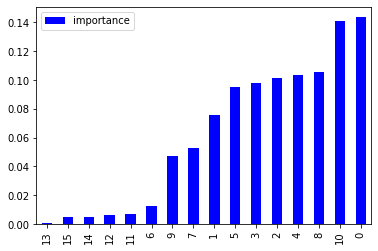

In [ ]:
model_Randomforest_smt= RandomForestClassifier(n_estimators= 100, criterion="gini", class_weight='balanced')  
model_Randomforest_smt.fit(X,y)
importance=model_Randomforest_smt.feature_importances_
df=pd.DataFrame({'features':pd.DataFrame(X).columns,'importance':importance})
df.set_index('importance')
df=df.sort_values('importance')
#importance.k_feature_names_
df.plot.bar(color='blue')

In [ ]:
X.head()

,CRS_ELAPSED_TIME,DEP_TIME_timeslot_weight,ORIGIN_AIRPORT_ID_timeslot_weight,OP_CARRIER_airline_timeslot_weight,ORIGIN_airline_timeslot_weight,TAIL_DELAY_weight,DAY_OF_WEEK_day_end,WEEK_DELAY_weight,DAY_OF_MONTH_DELAY_weight,MONTH_DELAY_weight,FL_NUM_Taxiout_weight,Dep_period_Early morning,Dep_period_Evening,Dep_period_Midnight,Dep_period_Morning,Dep_period_Night
0,150.0,7,56,43,56,3,1,6,23,0,63,0,0,0,1,0
1,195.0,15,92,151,92,9,0,1,0,0,63,0,1,0,0,0
2,177.0,3,56,43,56,8,0,5,24,4,63,0,0,0,1,0
3,177.0,3,56,43,56,5,0,1,17,4,63,0,0,0,1,0
4,70.0,1,8,23,8,3,1,6,10,4,63,1,0,0,0,0


In [ ]:
x_new=X[['DEP_TIME_timeslot_weight','ORIGIN_AIRPORT_ID_timeslot_weight','OP_CARRIER_airline_timeslot_weight','ORIGIN_airline_timeslot_weight','TAIL_DELAY_weight','DAY_OF_WEEK_day_end','WEEK_DELAY_weight','DAY_OF_MONTH_DELAY_weight','MONTH_DELAY_weight',	'FL_NUM_Taxiout_weight']]
x_new.shape

(215614, 10)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
Rscaler = RobustScaler()
pca = PCA(.95)
smote = SMOTE()
knn = KNeighborsClassifier(n_neighbors=10)

pipeline1 = make_pipeline(Rscaler,smote,pca,knn)
#X_train, X_test, y_train, y_test
kf = StratifiedKFold(n_splits=5)
y_pred_KNN_new = cross_val_predict(pipeline1,x_new, y, cv=kf)
conf_mat_KNN_new = confusion_matrix(y, y_pred_KNN_new)
print(conf_mat_KNN_new)
acc_Test_KNN_new= accuracy_score(y, y_pred_KNN_new)
print(acc_Test_KNN_new)
print(classification_report(y, y_pred_KNN_new))

[[137174  54620]
 [ 11402  12418]]
0.6937953936200804
              precision    recall  f1-score   support

           0       0.92      0.72      0.81    191794
           1       0.19      0.52      0.27     23820

    accuracy                           0.69    215614
   macro avg       0.55      0.62      0.54    215614
weighted avg       0.84      0.69      0.75    215614



In [ ]:
model_Randomforest_smt= RandomForestClassifier(n_estimators= 100, criterion="gini", class_weight='balanced')  
#Rscaler = RobustScaler()
oversample = SMOTE()
pipeline_RFsmt_new = make_pipeline(oversample,model_Randomforest_smt)

#model_Randomforest_smt = model_Randomforest_smt.fit(X_Train_scaled_smt, y_train_smt)
#y_pred_test_RF = model_Randomforest_smt.predict(X_Test_scaled)
#print('R2 Value RANDOM FOREST:',metrics.r2_score(X_Train_scaled_smt, model_Randomforest_smt.predict(X_Train_scaled_smt)))
kf = StratifiedKFold(n_splits=5)
y_pred_RF_OSample_new = cross_val_predict(pipeline_RFsmt_new,x_new, y, cv=kf)
print(confusion_matrix(y, y_pred_RF_OSample_new))
print(classification_report(y, y_pred_RF_OSample_new))

[[177666  14128]
 [ 17455   6365]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92    191794
           1       0.31      0.27      0.29     23820

    accuracy                           0.85    215614
   macro avg       0.61      0.60      0.60    215614
weighted avg       0.84      0.85      0.85    215614



## Approach 2

In [ ]:
systematic_sample_selectedcols.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_AIRPORT_ID,DEP_DEL15,DEP_DELAY,DEP_TIME,TAXI_OUT,WHEELS_OFF,CRS_ELAPSED_TIME,DEP_TIMEslot_BLK,Dep_period
0,1,17,7,N326NB,DL,1089,DFW,11298,0.0,-2.0,1151.0,28.0,1219.0,150.0,11,Morning
10,1,17,7,N356NW,DL,1097,SLC,14869,0.0,-9.0,939.0,31.0,1010.0,165.0,9,Morning
20,1,17,7,N878DN,DL,1112,SEA,14747,0.0,-4.0,1006.0,16.0,1022.0,124.0,10,Morning
30,1,17,7,N3732J,DL,1126,ATL,10397,0.0,-3.0,1310.0,14.0,1324.0,73.0,13,Afternoon
40,1,17,7,N819DN,DL,1140,DTW,11433,0.0,-6.0,559.0,26.0,625.0,138.0,5,Early morning


In [ ]:
systematic_sample_selectedcols_new=systematic_sample_selectedcols[['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','ORIGIN_AIRPORT_ID','DEP_TIMEslot_BLK','Dep_period','DEP_DEL15']]

In [ ]:
systematic_sample_selectedcols_new = pd.get_dummies(systematic_sample_selectedcols_new, drop_first=True)
systematic_sample_selectedcols_new.dtypes

MONTH                         int64
DAY_OF_MONTH                  int64
DAY_OF_WEEK                   int64
ORIGIN_AIRPORT_ID             int64
DEP_TIMEslot_BLK              int64
DEP_DEL15                   float64
Dep_period_Early morning      uint8
Dep_period_Evening            uint8
Dep_period_Midnight           uint8
Dep_period_Morning            uint8
Dep_period_Night              uint8
dtype: object

In [ ]:
y1_new = systematic_sample_selectedcols_new.DEP_DEL15 
 #Drop target and set the dependent values variables 
X1_new = systematic_sample_selectedcols_new.drop('DEP_DEL15', axis=1)
print(X1_new.shape,y1_new.shape)

(215614, 10) (215614,)


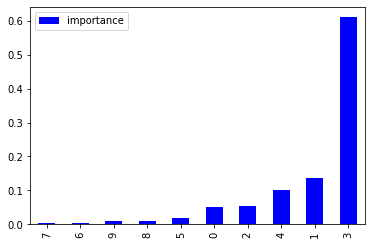

In [ ]:
model_Randomforest_smt= RandomForestClassifier(n_estimators= 100, criterion="gini", class_weight='balanced')  
model_Randomforest_smt.fit(X1_new,y1_new)
importance=model_Randomforest_smt.feature_importances_
df=pd.DataFrame({'features':pd.DataFrame(X1_new).columns,'importance':importance})
df.set_index('importance')
df=df.sort_values('importance')
#importance.k_feature_names_
df.plot.bar(color='blue')

In [ ]:
X1_new.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT_ID',
       'DEP_TIMEslot_BLK', 'Dep_period_Early morning', 'Dep_period_Evening',
       'Dep_period_Midnight', 'Dep_period_Morning', 'Dep_period_Night'],
      dtype='object')

In [ ]:
model_Randomforest_smt= RandomForestClassifier(n_estimators= 100, criterion="gini", class_weight='balanced')  
#Rscaler = RobustScaler()
oversample = SMOTE()
pipeline_RFsmt_new = make_pipeline(oversample,model_Randomforest_smt)

#model_Randomforest_smt = model_Randomforest_smt.fit(X_Train_scaled_smt, y_train_smt)
#y_pred_test_RF = model_Randomforest_smt.predict(X_Test_scaled)
#print('R2 Value RANDOM FOREST:',metrics.r2_score(X_Train_scaled_smt, model_Randomforest_smt.predict(X_Train_scaled_smt)))
kf = StratifiedKFold(n_splits=5)
y_pred_RF_OSample_new1 = cross_val_predict(pipeline_RFsmt_new,X1_new, y1_new, cv=kf)
print(confusion_matrix(y1_new, y_pred_RF_OSample_new1))
print(classification_report(y1_new, y_pred_RF_OSample_new1))

In [ ]:
from sklearn.linear_model import LogisticRegression
from numpy import mean
model_Randomforest_smt= RandomForestClassifier(n_estimators= 100, criterion="gini", class_weight='balanced')  
#model_LOGISTICSfit = model_LOGISTICS.fit(principalComponents_train, Y_Train)
pca = PCA(.95)
#Robust=RobustScaler()
oversample = SMOTE()
pipeline_RFsmt_new = make_pipeline(oversample,pca,model_Randomforest_smt)
kf = StratifiedKFold(n_splits=5)
y_pred_RF_OSample_new = cross_val_score(pipeline_RFsmt_new,X1_new,y1_new, scoring='roc_auc', cv=kf, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(y_pred_RF_OSample_new))

Mean ROC AUC: 0.635
